# Validation/assessment of TIWs in ACCESS-OM2-01 and ACCESS-OM2-025 IAF runs

This script summarizes the representation of TIWs in ACCESS-OM2-01 and ACCESS-OM2-025 when compared to OISST and CMEMS (AVISO) observations.

## First some daily snapshots

![2010-11-07](SST_SSH_snapshot_025deg_01deg_satobs_2010-11-07.png)
![2011-11-01](SST_SSH_snapshot_025deg_01deg_satobs_2011-11-01.png)

From these figures it is clear that:
- TIWs in both ACCESS-OM2-025 and ACCESS-OM2-01 seems to have shorter wavelengths and do not penetrate as far north as in the observations (e.g. 2010-11-07, top plot, there seem to be 5 wavelengths from 120 to 160W in ACCESS-OM2, compared to 3 in the SST and SSH observations). 
- The magnitude of the TIV SSH anomalies are much weaker than in the observations (factor of 2 at least).
- ACCESS-OM2-01 shows significant submesoscale variability and instabilities along the TIW fronts, which seem to result in less northward penetration of cold water than in ACCESS-OM2-025.

## Hovmoeller's of SST and SSH variability at 2N in the 2010-2011 season
![Hovmoeller](SST_2010_Hovemoeller_2N.png)
- This Hovmoeller plot shows similar features. The observations have much wider cold tongues and less TIWs/season than the models. The propagation speed also looks a bit faster.
- There is also the strange feature in the models that at the end of the season the TIWs actually seem to propage *eastwards* - possibly because of a too weak SEC?


## Comparison of 12-degree longitude high-pass filtered SST and SSH variability amplitude (2009-2019)
![Variance](SSH_SST_FiltPlot_01deg_025deg.png)
![Variance sum](SSH_SST_FiltPlot_LonAvg.png)

- Clearly both SST and SSH variability is significantly reduced in both models. The difference in SSH variability is particularly strong - with TIW SSH perturbations being <50%


## Where is this coming from? Likely: Lateral surface velocity shears? Comparison of meridional structure of surface currents, SST and SSH to observations (2000-2017)
![Variance](SSH_SST_u_140W_2000-2017.png)

These plots show:
- Much weaker NECC in the models than in observations - by 80% or so.
- Much weaker shear between NECC and SEC in the models.
- a weakened N-S SST gradient in the models.

Where is this coming from?

The weak NECC is a common feature of many ocean models. For example, the OMIP-1 and OMIP-2 models (Tsujino et al. 2020, GMD):
![OMIPssh](OMIP_SSH_bias.png)

The clear red (high) SSH bias around 10N is evident in both OMIP-1 (CORE forced) and OMIP-2 (JRA55 forced) models. It actually appears to be worse in the OMIP ensemble mean than it is in ACCESS-OM2.

The sources of this bias have been studied in the literature, in particular recently by the NCAR people:

Sun, Z.; Liu, H.; Lin, P.; Tseng, Y.-h.; Small, J. & Bryan, F.
The Modeling of the North Equatorial Countercurrent in the Community Earth System Model and its Oceanic Component 
J. Adv. Model. Earth Syst., 2019, 11, 531-544 

Sun, Z.; Small, J.; Bryan, F.; Tseng, Y.-h.; Liu, H. & Lin, P.
The impact of wind corrections and ocean-current influence on wind stress forcing on the modeling of Pacific North Equatorial Countercurrent 
Ocean Modelling, 2021, 101876 

THe proposed source (Sun 2019) in CORE runs is the correction to NCEP reanalysis from QuickSCAT observations. This is coming from:
1) neutral winds vs. 10m winds
2) double counting the current effect
3) rain contamination of QuickSCAT under the ITCZ.
JRA55 supposedly does a better job of 1), but still has problems and so that's probably not the dominant effect. Sun (2021) argue that it is largely the current effect 2?

- Bias correction's on QuickSCAT data (estimated as slowing NECC by 60%)
- Whether or not the ocean current is included in the stress calculation (relative winds) - (estimated as slowing NECC by 26-30%)

distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

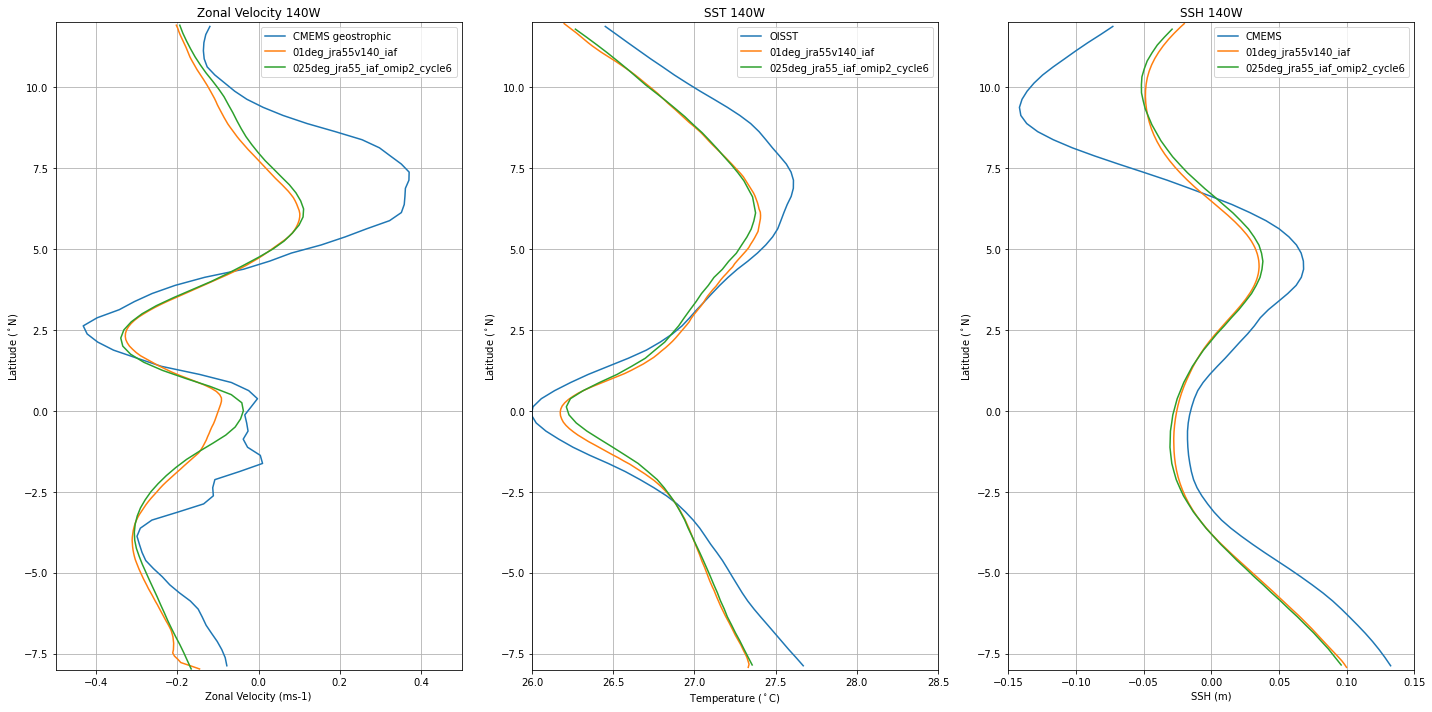

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


In [74]:
lon = -140.
lats = -8., 12.
deps = 0.
#dates = '2010-07-01','2011-07-01'
dates = '2000-01-01','2017-01-01'

#u_obs = SODA.u.sel(time=slice(dates[0],dates[1])).sel(xu_ocean=lon+360.,method='nearest').sel(yu_ocean=slice(lats[0],lats[1])).sel(st_ocean=deps,method='nearest').mean('time')
ugeo_obs = CMEMS.ugos.sel(time=slice(dates[0],dates[1])).sel(longitude=lon+360.,method='nearest').sel(latitude=slice(lats[0],lats[1])).mean('time')
u01 = cc.querying.getvar(exp01, 'u',session, frequency='1 monthly',start_time=dates[0],end_time=dates[1])
u01 = u01.sel(time=slice(dates[0],dates[1])).sel(xu_ocean=lon,method='nearest').sel(yu_ocean=slice(lats[0],lats[1])).sel(st_ocean=deps,method='nearest').mean('time')
u025 = cc.querying.getvar(exp025, 'u',session, frequency='1 monthly',start_time=dates[0],end_time=dates[1])
u025 = u025.sel(time=slice(dates[0],dates[1])).sel(xu_ocean=lon,method='nearest').sel(yu_ocean=slice(lats[0],lats[1])).sel(st_ocean=deps,method='nearest').mean('time')

#temp_soda = SODA.temp.sel(time=slice(dates[0],dates[1])).sel(xt_ocean=lon+360.,method='nearest').sel(yt_ocean=slice(lats[0],lats[1])).sel(st_ocean=deps,method='nearest').mean('time')
temp_oisst = OISST.sst.sel(time=slice(dates[0],dates[1])).sel(lon=lon+360.,method='nearest').sel(lat=slice(lats[0],lats[1])).mean('time')
temp01 = cc.querying.getvar(exp01, 'temp',session, frequency='1 monthly',start_time=dates[0],end_time=dates[1])
temp01 = temp01.sel(time=slice(dates[0],dates[1])).sel(xt_ocean=lon,method='nearest').sel(yt_ocean=slice(lats[0],lats[1])).sel(st_ocean=deps,method='nearest').mean('time')-273.15
temp025 = cc.querying.getvar(exp025, 'temp',session, frequency='1 monthly',start_time=dates[0],end_time=dates[1])
temp025 = temp025.sel(time=slice(dates[0],dates[1])).sel(xt_ocean=lon,method='nearest').sel(yt_ocean=slice(lats[0],lats[1])).sel(st_ocean=deps,method='nearest').mean('time')-273.15

ssh_obs = CMEMS.adt.sel(time=slice(dates[0],dates[1])).sel(longitude=lon+360.,method='nearest').sel(latitude=slice(lats[0],lats[1])).mean('time')
#ssh_soda = SODA.ssh.sel(time=slice(dates[0],dates[1])).sel(xt_ocean=lon+360.,method='nearest').sel(yt_ocean=slice(lats[0],lats[1])).mean('time')
ssh01 = cc.querying.getvar(exp01, 'sea_level',session, frequency='1 monthly',start_time=dates[0],end_time=dates[1])
ssh01 = ssh01.sel(time=slice(dates[0],dates[1])).sel(xt_ocean=lon,method='nearest').sel(yt_ocean=slice(lats[0],lats[1])).mean('time')
ssh025 = cc.querying.getvar(exp025, 'sea_level',session, frequency='1 monthly',start_time=dates[0],end_time=dates[1])
ssh025 = ssh025.sel(time=slice(dates[0],dates[1])).sel(xt_ocean=lon,method='nearest').sel(yt_ocean=slice(lats[0],lats[1])).mean('time')

# subtract mean:
ssh01=ssh01-ssh01.mean('yt_ocean')
ssh025=ssh025-ssh025.mean('yt_ocean')
ssh_obs=ssh_obs-ssh_obs.mean('latitude')
#ssh_soda=ssh_soda-ssh_soda.mean('yt_ocean')

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,10))

#u_obs.plot(ax=axes[0],label='SODA')
ugeo_obs.plot(ax=axes[0],label='CMEMS geostrophic')
u01.plot(ax=axes[0],label=exp01)
u025.plot(ax=axes[0],label=exp025)

#temp_soda.plot(ax=axes[1],label='SODA')
temp_oisst.plot(ax=axes[1],label='OISST')
temp01.plot(ax=axes[1],label=exp01)
temp025.plot(ax=axes[1],label=exp025)

#ssh_soda.plot(ax=axes[2],label='SODA')
ssh_obs.plot(ax=axes[2],label='CMEMS')
ssh01.plot(ax=axes[2],label=exp01)
ssh025.plot(ax=axes[2],label=exp025)

for ax in axes:
    for obj in ax.lines:   
        newx = obj.get_ydata()
        newy = obj.get_xdata()
        obj.set_xdata(newx)
        obj.set_ydata(newy)

axes[0].set_title('Zonal Velocity 140W')
axes[1].set_title('SST 140W')
axes[2].set_title('SSH 140W')
axes[0].grid()
axes[1].grid()
axes[2].grid()
axes[0].legend()
axes[0].set_xlim([-0.5,0.5])
axes[0].set_ylim([lats[0],lats[1]])
axes[1].set_xlim([26.,28.5])
axes[1].set_ylim([lats[0],lats[1]])
axes[1].legend()
axes[2].set_xlim([-0.15,0.15])
axes[2].set_ylim([lats[0],lats[1]])
axes[2].legend()

axes[0].set_xlabel('Zonal Velocity (ms-1)')
axes[0].set_ylabel('Latitude ($^\circ$N)')
axes[1].set_xlabel('Temperature ($^\circ$C)')
axes[1].set_ylabel('Latitude ($^\circ$N)')
axes[2].set_xlabel('SSH (m)')
axes[2].set_ylabel('Latitude ($^\circ$N)')

#axes[0].invert_yaxis()
#axes[1].invert_yaxis()
plt.tight_layout()
plt.savefig('SSH_SST_u_140W_2000-2017.png',dpi=100)

# Compare vertical profiles

In [8]:
# TAO data extraction function:
obs_th = 2500 # This criteria denotes the minimum number of observations at a given depth required to include this point in the comparison.
def get_TAO(lonTAO):
    # Load temperature:
    tao_file_temp = xr.open_dataset('/g/data/ik11/observations/TAO/t0n' + lonTAO + '_dy.cdf')
    tao_temp = tao_file_temp['T_20'].isel(lon=0).isel(lat=0).sel(depth=slice(0,400))
    tao_temp = tao_temp.where(tao_temp!=1.e35)
    count = np.count_nonzero(~np.isnan(tao_temp), axis=0)
    tao_temp = tao_temp.isel(depth=count>=obs_th) # Only average if more than x observations at given depth
    
    # Load zonal velocity from ADCP data:
    tao_file_u = xr.open_dataset('/g/data/ik11/observations/TAO/adcp0n' + lonTAO + '_dy.cdf')
    tao_u = tao_file_u['u_1205'].isel(lon=0).isel(lat=0).sel(depth=slice(0,400))/100.
    tao_u = tao_u.where(abs(tao_u)<=100.)
    count = np.count_nonzero(~np.isnan(tao_u), axis=0)
    tao_u = tao_u.isel(depth=count>=obs_th)  # Only average if more than x observations at given depth

    # Load zonal velocity from current data:
    tao_file_uc = xr.open_dataset('/g/data/ik11/observations/TAO/cur0n' + lonTAO + '_dy.cdf')
    tao_uc = tao_file_uc['U_320'].isel(lon=0).isel(lat=0).sel(depth=slice(0,400))/100.
    tao_uc = tao_uc.where(abs(tao_uc)<=100.)
    count = np.count_nonzero(~np.isnan(tao_uc), axis=0)
    tao_uc = tao_uc.isel(depth=count>=obs_th)  # Only average if more than x observations at given depth
    
    return tao_temp, tao_u, tao_uc

# Johnson data function:
def get_Joh(lonJoh):
    joh_file = xr.open_dataset('/g/data/ik11/observations/Johnson2002/meanfit_m.cdf')
    joh_temp = joh_file['POTEMPM']
    joh_u = joh_file['UM']

    joh_temp_eq = joh_temp.sel(ZDEP1_50=slice(0,400)).sel(YLAT11_101=0., method='nearest').sel(XLON=lonJoh,method='nearest')
    joh_u_eq = joh_u.sel(ZDEP1_50=slice(0,400)).sel(YLAT11_101=0., method='nearest').sel(XLON=lonJoh,method='nearest')
    dep_joh = joh_temp_eq.ZDEP1_50
    
    return joh_temp_eq, joh_u_eq, dep_joh
    
# WOA data function:
def get_WOA(lonWOA):
    temp_WOA13_10 = cc.querying.getvar('025_KDS50', 'temp',session).mean('time').sel(GRID_Y_T=0.,method='nearest')
    woa_temp_eq = temp_WOA13_10.sel(GRID_X_T=lonWOA,method='nearest')
    
    return woa_temp_eq

distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 35% CPU time recently (threshold: 10%)


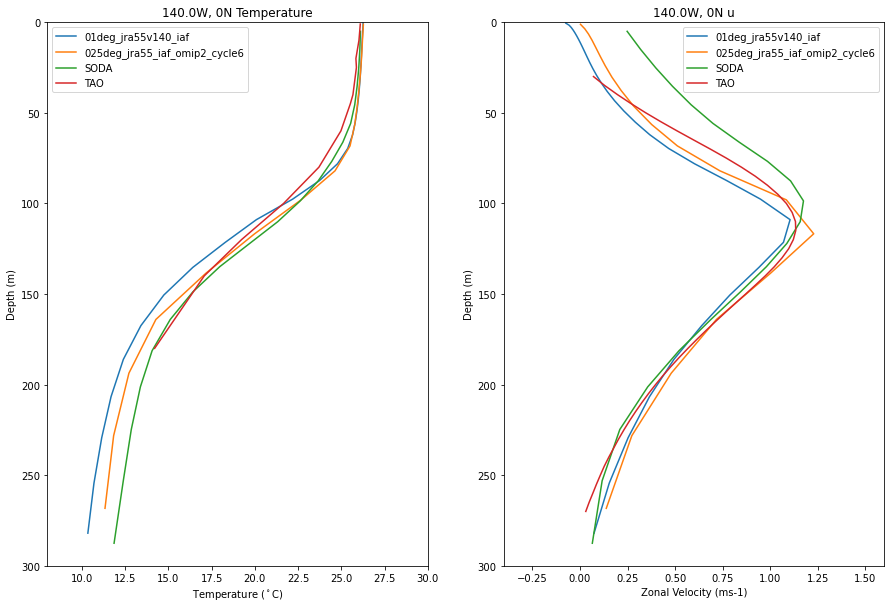

In [37]:
lon = -140.
lat = 0.
deps = 0.,300.
#dates = '2010-07-01','2010-11-15'#'2011-07-01'
dates = '2000-01-01','2006-01-01'#'2011-07-01'

u_soda = SODA.u.sel(time=slice(dates[0],dates[1])).sel(xu_ocean=lon+360.,method='nearest').sel(yu_ocean=lat,method='nearest').sel(st_ocean=slice(deps[0],deps[1])).mean('time')
u01 = cc.querying.getvar(exp01, 'u',session, frequency='1 monthly',start_time=dates[0],end_time=dates[1])
u01 = u01.sel(time=slice(dates[0],dates[1])).sel(xu_ocean=lon,method='nearest').sel(yu_ocean=lat,method='nearest').sel(st_ocean=slice(deps[0],deps[1])).mean('time')
u025 = cc.querying.getvar(exp025, 'u',session, frequency='1 monthly',start_time=dates[0],end_time=dates[1])
u025 = u025.sel(time=slice(dates[0],dates[1])).sel(xu_ocean=lon,method='nearest').sel(yu_ocean=lat,method='nearest').sel(st_ocean=slice(deps[0],deps[1])).mean('time')

temp_soda = SODA.temp.sel(time=slice(dates[0],dates[1])).sel(xt_ocean=lon+360.,method='nearest').sel(yt_ocean=lat,method='nearest').sel(st_ocean=slice(deps[0],deps[1])).mean('time')
temp01 = cc.querying.getvar(exp01, 'temp',session, frequency='1 monthly',start_time=dates[0],end_time=dates[1])
temp01 = temp01.sel(time=slice(dates[0],dates[1])).sel(xt_ocean=lon,method='nearest').sel(yt_ocean=lat,method='nearest').sel(st_ocean=slice(deps[0],deps[1])).mean('time')-273.15
temp025 = cc.querying.getvar(exp025, 'temp',session, frequency='1 monthly',start_time=dates[0],end_time=dates[1])
temp025 = temp025.sel(time=slice(dates[0],dates[1])).sel(xt_ocean=lon,method='nearest').sel(yt_ocean=lat,method='nearest').sel(st_ocean=slice(deps[0],deps[1])).mean('time')-273.15

tao_temp, tao_u, tao_uc = get_TAO('140w')
#joh_temp_eq, joh_u_eq, dep_joh = get_Joh(lons[lkey]['joh'])
# woa_temp_eq = get_WOA(lons[lkey]['woa'])

tao_temp = tao_temp.sel(time=slice(dates[0],dates[1]))
tao_u = tao_u.sel(time=slice(dates[0],dates[1]))

f,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,10),facecolor='white')
 
# Loop through and plot models:
temp01.plot(ax=axes[0],label=exp01)
temp025.plot(ax=axes[0],label=exp025)
temp_soda.plot(ax=axes[0],label='SODA')
tao_temp.mean('time').plot(ax=axes[0],label='TAO')
# woa_temp.plot(ax=axes[0],label='WOA13')

u01.plot(ax=axes[1],label=exp01)
u025.plot(ax=axes[1],label=exp025)
u_soda.plot(ax=axes[1],label='SODA')
tao_u.mean('time').plot(ax=axes[1],label='TAO')

for ax in axes:
    for obj in ax.lines:   
        newx = obj.get_ydata()
        newy = obj.get_xdata()

# set new x- and y- data for the line
        obj.set_xdata(newx)
        obj.set_ydata(newy)
        
# tao_u.plot(ax=axes[1],label='TAO')
axes[0].set_xlabel('Temperature ($^\circ$C)')
axes[0].set_ylabel('Depth (m)')
axes[0].legend()
axes[0].set_ylim([0.,300.])
axes[0].set_xlim([8.,30.])
axes[0].set_title(str(-lon) + 'W, 0N Temperature')

axes[1].set_xlabel('Zonal Velocity (ms-1)')
axes[1].set_ylabel('Depth (m)')
axes[1].legend()
axes[1].set_ylim([0.,300.])
axes[1].set_xlim([-0.4,1.6])
axes[1].set_title(str(-lon) + 'W, 0N u')

for ax in axes:
    ax.invert_yaxis()

plt.savefig('Temp_U_Profiles_140W_2000-2006.png',dpi=100)

In [ ]:
# Define longitudes
lons = {'165e': {'mod': -195.,'tao': '165e','joh': 165.,'woa': -195.},
        '140w': {'mod': -140.,'tao': '140w','joh': 220.,'woa': -140.},
        '110w': {'mod': -110.,'tao': '110w','joh': 250.,'woa': -110.}
        }

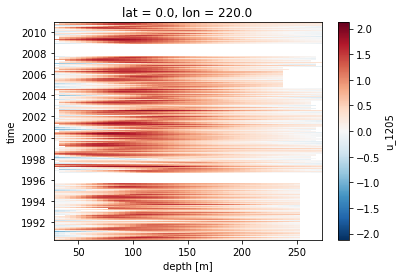

In [36]:
tao_temp, tao_u, tao_uc = get_TAO('140w')
tao_u.plot()

In [63]:
CMEMS.ugos

<xarray.DataArray 'ugos' (time: 10016, latitude: 720, longitude: 1440)>
dask.array<concatenate, shape=(10016, 720, 1440), dtype=float64, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2020-06-03
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Attributes:
    grid_mapping:   crs
    long_name:      Absolute geostrophic velocity: zonal component
    standard_name:  surface_geostrophic_eastward_sea_water_velocity
    units:          m/s